In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import pandas as pd
import numpy as np
import glob as gb
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential ,Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,SeparableConv2D
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16

In [2]:
datapath="/kaggle/input/brain-mri-images-for-brain-tumor-detection/"

In [3]:
new_size=224    
X = []
y = []
for folder in  os.listdir(datapath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( datapath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'no':0, 'yes':1}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X.append(resized_image)
        y.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X) , " items") 
print("items in y_train is:       ",len(y) , " items") 

folder name is :  no
numbers of images in folder are :  85
 start reading images
image reading ...finished
folder name is :  yes
numbers of images in folder are :  86
 start reading images
image reading ...finished
folder name is :  brain_tumor_dataset
numbers of images in folder are :  0
 start reading images
image reading ...finished
--------------------------------------------------
items in X_train is:        171  items
items in y_train is:        171  items


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=7)

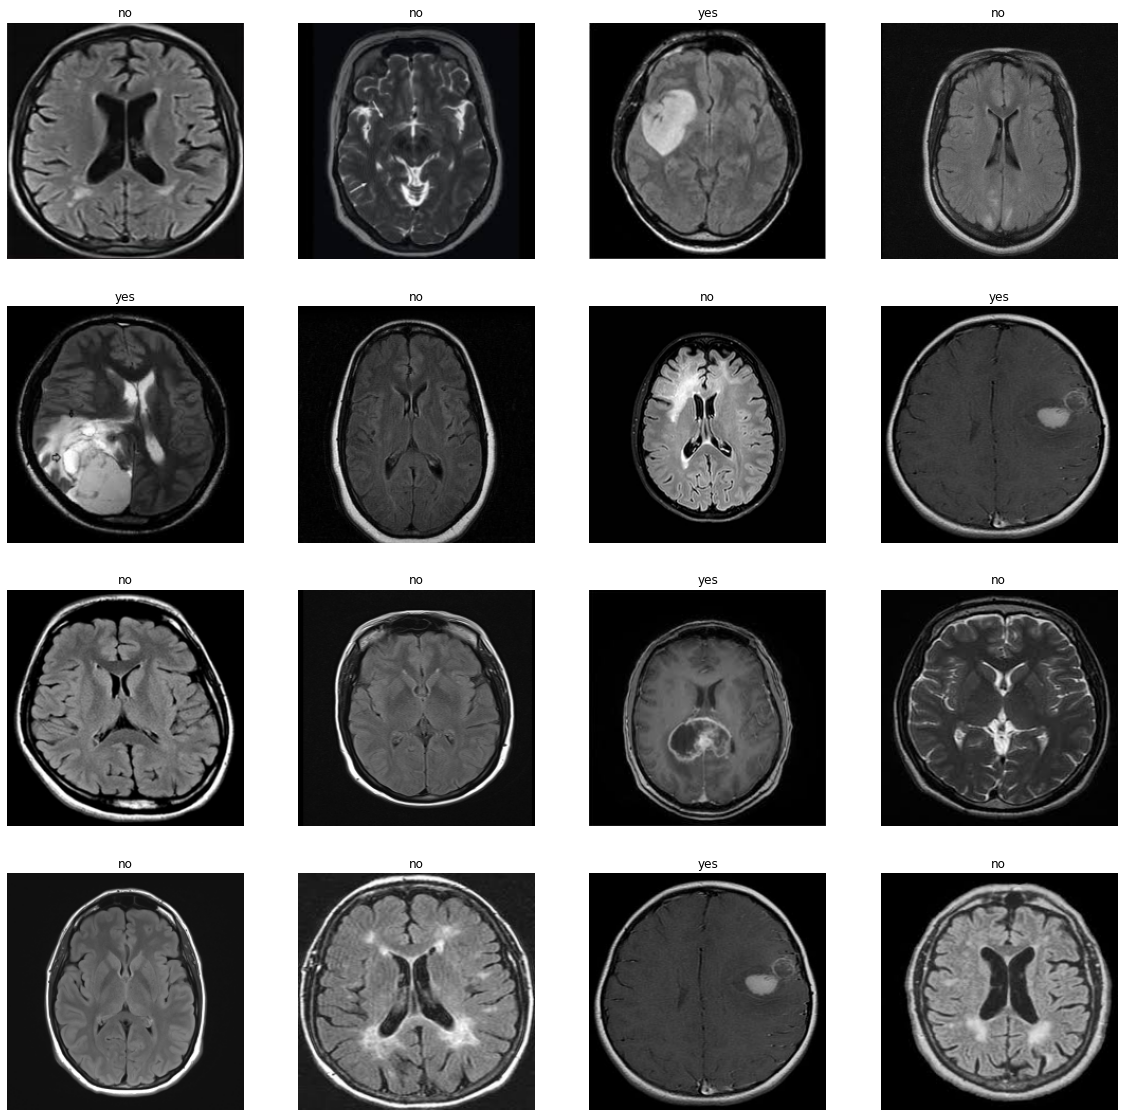

In [5]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes  = {'no':0, 'yes':1}

    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (119, 224, 224, 3)
y_train shape : (119,)


In [7]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (52, 224, 224, 3)
y_test shape : (52,)


# CNN

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')

for layer in model.layers[:80]:
    layer.trainable = False

for layer in model.layers[80:]:
    layer.trainable = True

94781440/94765736 [==============================] - 0s 0us/step


In [9]:
len(model.layers)

175

In [10]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
x=Flatten()(model.output)

x=Dropout(rate=0.5)(x)

x=Dense(512,activation = "relu")(x)
x=Dropout(rate=0.3)(x)
x=Dropout(rate=0.3)(x)

x=Dense(4, activation='softmax')(x)

model = Model(model.input, x)

In [12]:
opt=tf.keras.optimizers.Adam(0.0001)
#compliling model
#model.compile(optimizer='adam',loss='categorical_crossentropy' , metrics='accuracy')
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [13]:
X_train.shape,y_train.shape

((119, 224, 224, 3), (119,))

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_gen  = ImageDataGenerator()
test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True, 
      batch_size= 64
      )

In [15]:
history= model.fit(X_train,y_train,validation_data=test,epochs=25,verbose=1,batch_size=32)

Epoch 1/25
4/4 [==============================] - 18s 1s/step - loss: 3.8074 - accuracy: 0.4790 - val_loss: 1.2708 - val_accuracy: 0.7308
Epoch 2/25
4/4 [==============================] - 1s 253ms/step - loss: 0.9565 - accuracy: 0.8655 - val_loss: 2.9346 - val_accuracy: 0.6538
Epoch 3/25
4/4 [==============================] - 1s 249ms/step - loss: 0.2607 - accuracy: 0.9664 - val_loss: 1.2251 - val_accuracy: 0.8077
Epoch 4/25
4/4 [==============================] - 1s 253ms/step - loss: 0.0806 - accuracy: 0.9832 - val_loss: 1.9497 - val_accuracy: 0.7885
Epoch 5/25
4/4 [==============================] - 1s 244ms/step - loss: 3.0172e-04 - accuracy: 1.0000 - val_loss: 3.0999 - val_accuracy: 0.7115
Epoch 6/25
4/4 [==============================] - 1s 252ms/step - loss: 0.1020 - accuracy: 0.9748 - val_loss: 2.5158 - val_accuracy: 0.7500
Epoch 7/25
4/4 [==============================] - 1s 253ms/step - loss: 0.0399 - accuracy: 0.9916 - val_loss: 2.4114 - val_accuracy: 0.7500
Epoch 8/25
4/4 [==

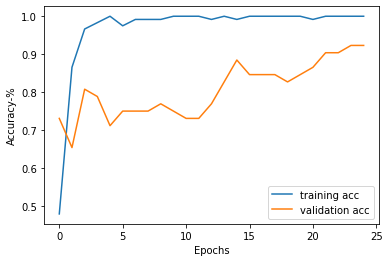

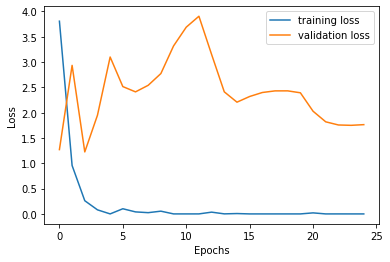

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy-%')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [17]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 651ms/step - loss: 1.7637 - accuracy: 0.9231
Train accuracy: 1.0
Test accuracy: 0.9230769276618958


# VGG 16

In [18]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [19]:
# freeze base layers
for layer in base_model.layers:
    layer.trainable=False

In [20]:

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',patience = 6)

my_callbacks = [early_stop]

In [22]:
history = model.fit(
    X_train,
    y_train,
    epochs=30, 
    validation_data=test,
    verbose = 1,
    callbacks=[my_callbacks]
)

Epoch 1/30
4/4 [==============================] - 20s 5s/step - loss: 5.9911 - accuracy: 0.4874 - val_loss: 3.8197 - val_accuracy: 0.5577
Epoch 2/30
4/4 [==============================] - 1s 206ms/step - loss: 5.4060 - accuracy: 0.5546 - val_loss: 4.9718 - val_accuracy: 0.5962
Epoch 3/30
4/4 [==============================] - 1s 226ms/step - loss: 3.7047 - accuracy: 0.6471 - val_loss: 4.0639 - val_accuracy: 0.5577
Epoch 4/30
4/4 [==============================] - 1s 220ms/step - loss: 2.9281 - accuracy: 0.7143 - val_loss: 3.0785 - val_accuracy: 0.6923
Epoch 5/30
4/4 [==============================] - 1s 208ms/step - loss: 2.9640 - accuracy: 0.6891 - val_loss: 2.4817 - val_accuracy: 0.7308
Epoch 6/30
4/4 [==============================] - 1s 214ms/step - loss: 1.6233 - accuracy: 0.7731 - val_loss: 2.0903 - val_accuracy: 0.7308
Epoch 7/30
4/4 [==============================] - 1s 223ms/step - loss: 2.3137 - accuracy: 0.7731 - val_loss: 1.9191 - val_accuracy: 0.7308
Epoch 8/30
4/4 [======

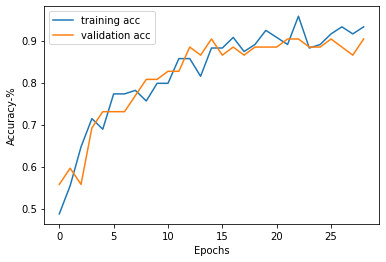

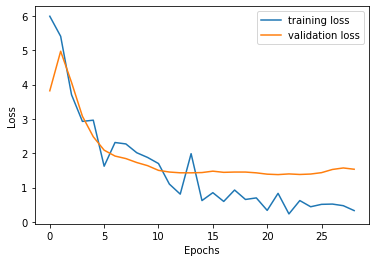

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy-%')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [24]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

2/2 [==============================] - 4s 4s/step - loss: 1.5348 - accuracy: 0.9038
Train accuracy: 1.0
Test accuracy: 0.9038461446762085
